In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as stats
import seaborn as sns

In [2]:
df = pd.read_csv(r"D:\Study\BA\CAB\Cab_Data.csv")

In [3]:
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,02-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,07-01-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,03-01-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB


In [5]:
df1 = pd.read_csv(r"D:\Study\BA\CAB\City.csv")

In [6]:
df1.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [8]:
df2 = pd.read_csv(r"D:\Study\BA\CAB\Customer_ID.csv")

In [9]:
df2.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [11]:
df3 = pd.read_csv(r"D:\Study\BA\CAB\Transaction_ID.csv")

In [12]:
df3.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [13]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [14]:
df.nunique()

Transaction ID    359392
Date of Travel      1095
Company                2
City                  19
KM Travelled         874
Price Charged      99176
Cost of Trip       16291
dtype: int64

In [15]:
df.isna().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

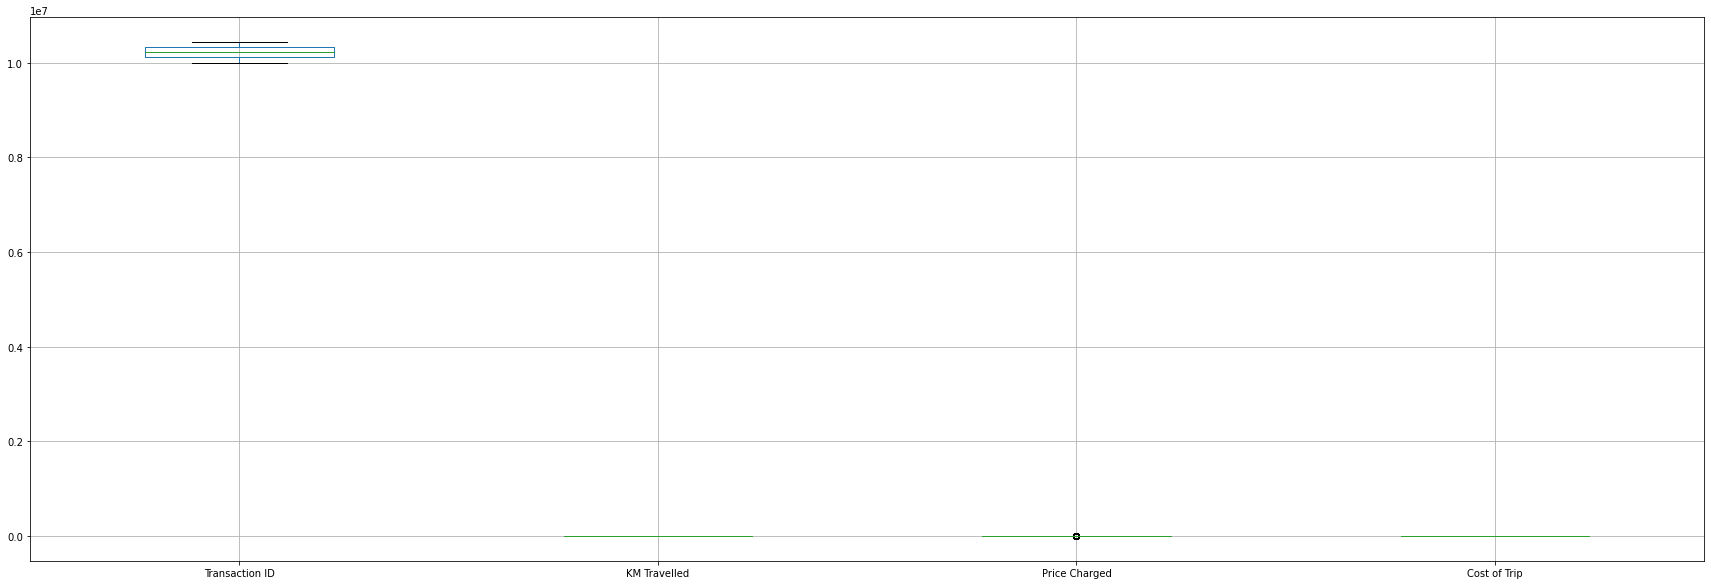

In [16]:
df.boxplot(figsize=(30,10))

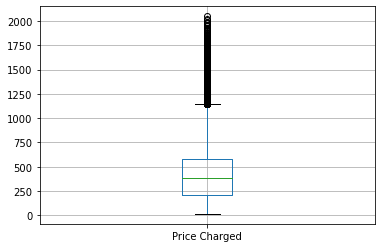

In [17]:
df.boxplot("Price Charged")

In [18]:
#converting to date and time format
df['Date of Travel']=pd.to_datetime(df['Date of Travel'])

In [19]:
#seperating pickup date and time format into diffrent columns 
df['month'] = df["Date of Travel"].dt.month
df['weekday'] = df["Date of Travel"].dt.weekday
df['hour'] = df["Date of Travel"].dt.hour

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
 7   month           359392 non-null  int64         
 8   weekday         359392 non-null  int64         
 9   hour            359392 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(2)
memory usage: 27.4+ MB


In [21]:
df = df.drop(['Date of Travel'],axis=1)

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Company'] = le.fit_transform(df['Company'])
df['City'] = le.fit_transform(df['City'])

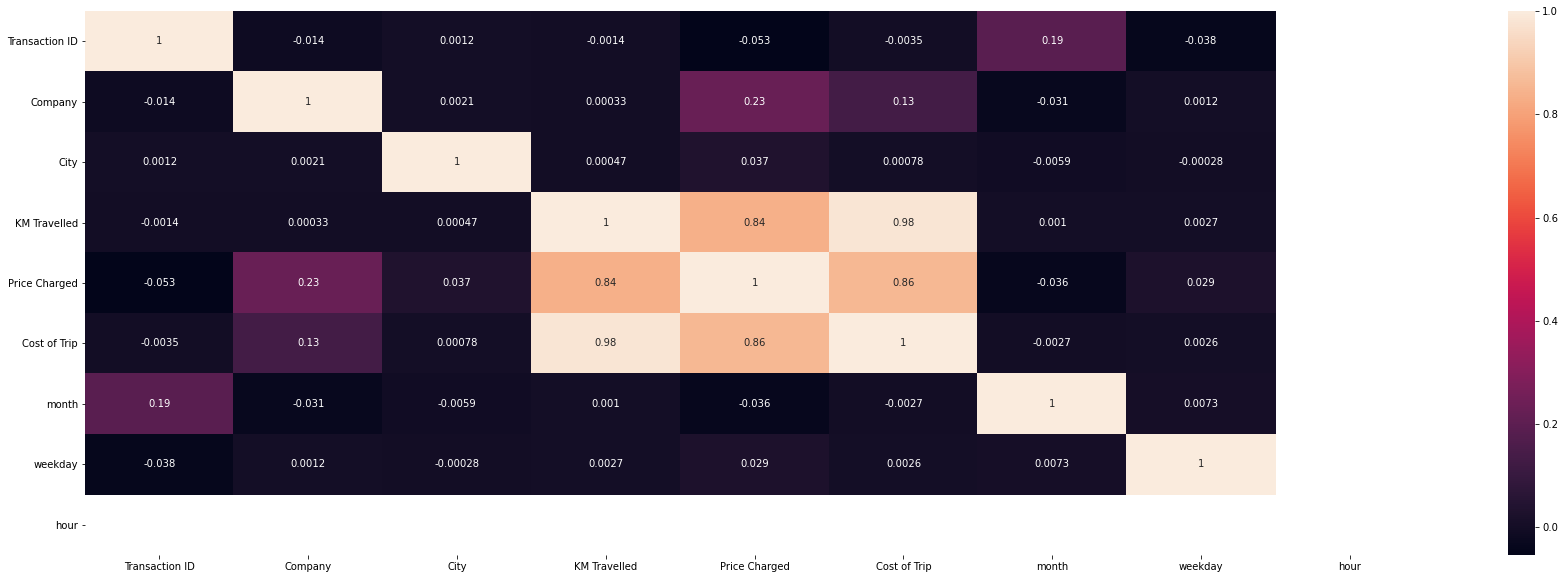

In [23]:
corr = df.corr()
plt.subplots(figsize = (30,10))
sns.heatmap(corr,annot=True)

In [24]:
y= df['Price Charged']
x= df.drop(['Price Charged'],axis=1)

In [25]:
y = y.values.reshape(-1,1)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=.20)

In [41]:
from xgboost import XGBRegressor

In [54]:
#Setting up Hyper Parameters

In [55]:
from sklearn.model_selection import RandomizedSearchCV
para ={
    "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
    "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
    "min_child_weight" : [ 1, 3, 5, 7 ],
    "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
    "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [56]:
model = XGBRegressor()

In [57]:
random_search=RandomizedSearchCV(model,param_distributions=para)

In [58]:
random_search.fit(x_train,y_train)

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs...
                                          num_parallel_tree=None,
                                          random_state=None, reg_alpha=None,
                                          reg_lambda=None,
        

In [59]:
random_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0.4, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=10,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [60]:
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 10,
 'learning_rate': 0.2,
 'gamma': 0.4,
 'colsample_bytree': 0.4}

In [61]:
random_search.best_score_

0.9601949430074079

In [62]:
model = XGBRegressor(min_child_weight = 3,
 max_depth = 10,
 learning_rate = 0.2,
 gamma = 0.4,
 colsample_bytree = 0.4)

In [63]:
model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0.4, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=10,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [64]:
result = model2.predict(x_test)

In [65]:
y_test = pd.DataFrame(y_test)

In [66]:
result = pd.DataFrame(result)

In [67]:
overview=pd.concat([y_test,result],axis=1)

In [68]:
overview.head(10)

,0,0
0,177.46,236.670319
1,259.27,312.659454
2,269.09,289.391754
3,478.38,570.992798
4,208.98,215.055771
5,97.98,91.304939
6,970.61,879.958496
7,172.60,193.887955
8,597.74,608.069580
9,134.44,119.174324


In [69]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, result)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, result)
print("R2:", r2)

MSE: 3359.4659558739418
RMSE: 57.96090023346723
R2: 0.9558913944357765


In [70]:
from sklearn.model_selection import cross_val_score

In [71]:
scores = cross_val_score(model, y_test, result)

In [72]:
scores

array([0.95627391, 0.95972171, 0.95792399, 0.95596707, 0.95717202])